# Lab 2b: Model selection
## Dark matter
We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). The task is to classifying gamma rays, which consist of high-energy particles. When they hit our atmosphere, they produce chain reactions of other particles called 'showers'. However, similar showers are also produced by other particles (hadrons). We want to be able to detect which ones originate from gamma rays and which ones come from background radiation. To do this, the observed shower patterns are observed and converted into 10 numeric features. You need to detect whether these are gamma rays or background radiation. This is a key aspect of research into dark matter, which is believed to generate such gamma rays. If we can detect where they occur, we can build a map of the origins of gamma radiation, and locate where dark matter may occur in the observed universe. However, we'll first need to accurately detect these gamma rays first.

A quick visualization of the features is shown below. Note that this is not a time series, we just plot the instances in the order they occur in the dataset. The first 12500 or so are examples of signal (gamma), the final 6700 or so are background (hadrons).

In [1]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

In [2]:
# Download MAGIC Telescope data from OpenML. You can repeat this analysis with any other OpenML classification dataset.
magic = oml.datasets.get_dataset(1120)
X, y, _, _ = magic.get_data(target=magic.default_target_attribute, dataset_format='array'); 
attribute_names = [f.name for i,f in magic.features.items()][:-1][1:]

C:\Users\lucas\AppData\Local\Temp\ipykernel_44676\2616928666.py:3: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = magic.get_data(target=magic.default_target_attribute, dataset_format='array');


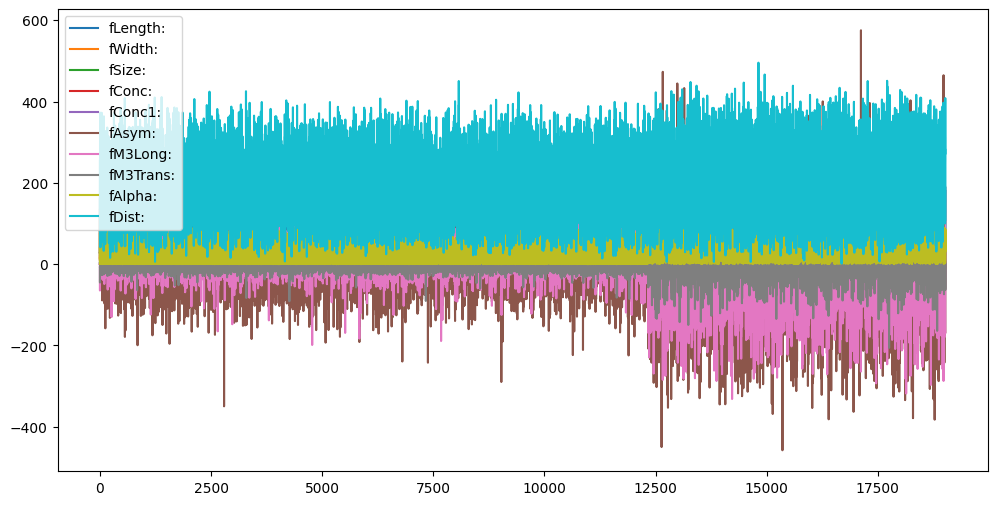

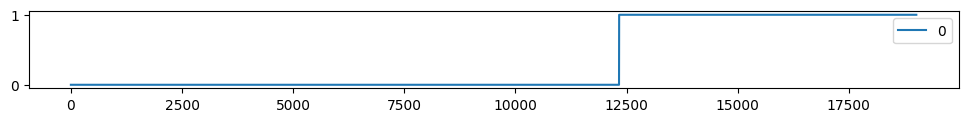

In [3]:
# Quick visualization of the features (top) and the target (bottom)
magic_df = pd.DataFrame(X, columns=attribute_names)
magic_df.plot(figsize=(12,6))
# Also plot the target: 1 = background, 0 = gamma
pd.DataFrame(y).plot(figsize=(12,1));

## Exercise 1: Metrics
Train and evaluate an SVM with RBF kernel (default hyperparameters) using a standard 25% holdout. Report the accuracy, precision, recall, F1 score, and area under the ROC curve (AUC).

Answer the following questions:
* How many of the detected gamma rays are actually real gamma rays?
* How many of all the gamma rays are we detecting?
* How many false positives and false negatives occur?

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svc = SVC(kernel="rbf").fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

svc_roc_score = roc_auc_score(y_test, svc.decision_function(X_test))
print(f"ROC AUC score: {svc_roc_score}")

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3092
           1       0.88      0.59      0.70      1663

    accuracy                           0.83      4755
   macro avg       0.84      0.77      0.79      4755
weighted avg       0.83      0.83      0.82      4755

ROC AUC score: 0.8759701485570973


* How many of the detected gamma rays are actually real gamma rays?

Precision reports true positives over true positives and false positives (so percentage of reported gamma rays that are actually gamma rays).
If we look at the classification report we see that the precision for gamma (1) is 0.88. So out of all the detected gamma rays 88% is reallly a gamma ray.

* How many of all the gamma rays are we detecting? 

Recall reports the true positives over the true positives and false negatives so predicted gamma rays divided by all true gamma rays.
If we look at the classification report we see that the recall for gamma (1) is 0.59. So out of all true gamma rays 59% is predicted to be a gamma ray.

* How many false positives and false negatives occur?

In the classification report the support is the number of true occurences of the class. So the support is FN + TP.
Recall = TP / TP + FN, so  0.59 = TP / 1663 <=> TP = 0.59 * 1663 ≈ 981

False negatives = support - TP = 1663 - 981 = 682

Precision = TP / TP + FP <=> 0.88 = 981 / 981 + FP <=> 0.88(981 + FP) = 981 <=> 863 + 0.88FP ≈ 981 <=> 0.88FP ≈ 118 <=> FP ≈ 134

So false positive = 134,
false negatives = 682

## Exercise 2: Preprocessing
SVMs require scaling to perform well. For now, use the following code to scale the data (we'll get back to this in the lab about preprocessing and pipelines). Repeat question 2 on the scaled data. Have the results improved? 

In [5]:
from sklearn.preprocessing import StandardScaler
# Important here is to fit the scaler on the training data alone
# Then, use it to scale both the training set and test set
# This assumes that you named your training set X_train. Adapt if needed.
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

svc = SVC(kernel="rbf").fit(Xs_train, y_train)
print(classification_report(y_test, svc.predict(Xs_test)))

svc_roc_score = roc_auc_score(y_test, svc.decision_function(Xs_test))
print(f"ROC AUC score: {svc_roc_score}")

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3092
           1       0.90      0.71      0.79      1663

    accuracy                           0.87      4755
   macro avg       0.88      0.83      0.85      4755
weighted avg       0.87      0.87      0.87      4755

ROC AUC score: 0.9162179433822975


* How many of the detected gamma rays are actually real gamma rays?

Precision reports true positives over true positives and false positives (so percentage of reported gamma rays that are actually gamma rays).
If we look at the classification report we see that the precision for gamma (1) is 0.86. So out of all the detected gamma rays 86% is reallly a gamma ray.

* How many of all the gamma rays are we detecting? 

Recall reports the true positives over the true positives and false negatives so predicted gamma rays divided by all true gamma rays.
If we look at the classification report we see that the recall for gamma (1) is 0.71. So out of all true gamma rays 71% is predicted to be a gamma ray.

* How many false positives and false negatives occur?

In the classification report the support is the number of true occurences of the class. So the support is FN + TP.
Recall = TP / TP + FN, so  0.71 = TP / 1663 <=> TP = 0.59 * 1663 ≈ 1181

False negatives = support - TP = 1663 - 1181 = 482

Precision = TP / TP + FP <=> 0.9 = 1181 / 1181 + FP <=> 0.9(1181 + FP) = 1181 <=> 1063 + 0.9FP ≈ 1181 <=> 0.9FP ≈ 118 <=> FP ≈ 131

So false positive = 131,
false negatives = 482

## Exercise 3: Hyperparameter optimization
Use 50 iterations of random search to tune the $C$ and $gamma$ hyperparameters on the scaled training data. Vary both on a log scale (e.g. from 2^-12 to 2^12). Optimize on AUC and use 3 cross-validation (CV) folds for the inner CV to estimate performance. For the outer loop, just use the train-test split you used before (hence, no nested CV). Report the best hyperparameters and the corresponding AUC score. Is it better than the default? Finally, use them to evaluate the model on the held-out test set, for all 5 metrics we used before.

Extra challenge: plot the samples used by the random search ($C$ vs $gamma$)

Note: The reason we don't use a nested CV just yet is because we would need to rebuild the scaled training and test set multiple times. This is tedious, unless we use pipelines, which we'll cover in a future lab.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loguniform

# Sample 50 random values for C and gamma
n_samples = 50
random_C = loguniform(2**-12, 2**12).rvs(size=n_samples)
random_gamma = loguniform(2**-12, 2**12).rvs(size=n_samples)


In [14]:
from sklearn.model_selection import cross_validate

test_scores = []

# Perform random search with inner 3-fold CV
for i in range(n_samples):
    print(f"Iteration {i+1}/{n_samples}")

    cv=cross_validate(SVC(kernel="rbf", C=random_C[i], gamma=random_gamma[i]), Xs_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1)
    test_scores.append(np.mean(cv['test_score']))


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49


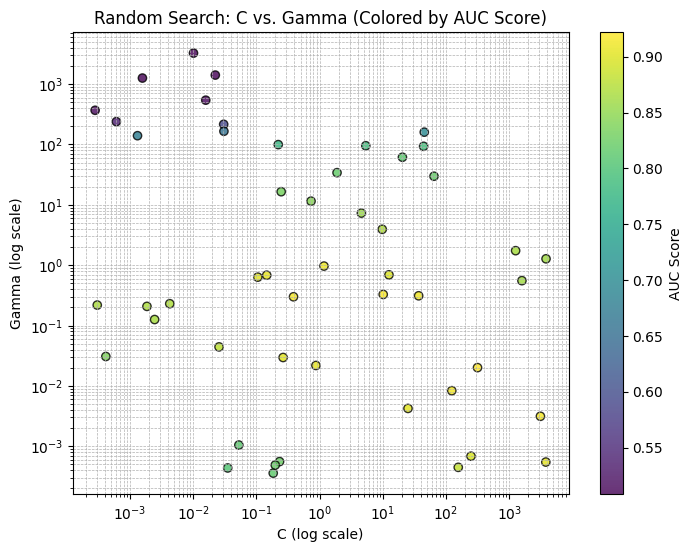

In [15]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(random_C, random_gamma, c=test_scores, cmap="viridis", alpha=0.8, edgecolors='k')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Gamma (log scale)")
plt.title("Random Search: C vs. Gamma (Colored by AUC Score)")
plt.colorbar(scatter, label="AUC Score")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [16]:
best_idx = np.argmax(test_scores)
best_C = random_C[best_idx]
best_gamma = random_gamma[best_idx]
best_auc = test_scores[best_idx]

print("\nBest Hyperparameters:")
print(f"C = {best_C}, Gamma = {best_gamma}")
print(f"Best AUC = {best_auc:.4f}")



Best Hyperparameters:
C = 316.16922503150255, Gamma = 0.020108818380223915
Best AUC = 0.9221


## Exercise 4: Threshold calibration
First, plot the Precision-Recall curve for the SVM using the default parameters on the scaled data. Then, calibrate the threshold to find a solution that yields better recall without sacrificing too much precision.

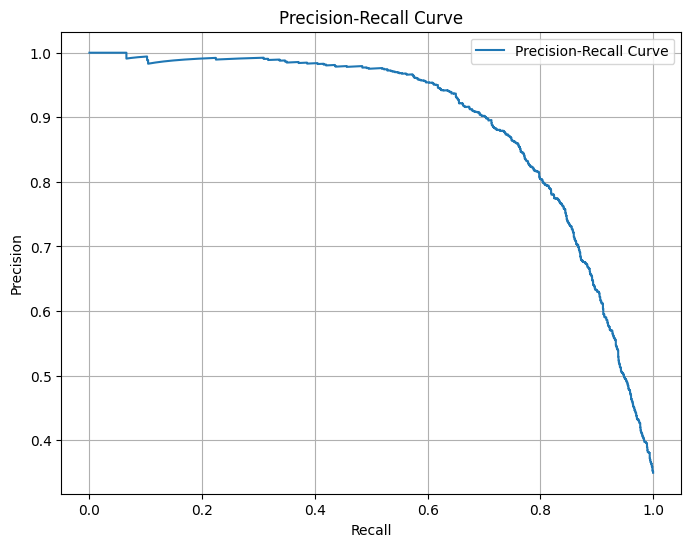

In [18]:
from sklearn.metrics import precision_recall_curve

svc = SVC(kernel="rbf", probability=True).fit(Xs_train, y_train)

y_pred = svc.predict(Xs_test)
y_scores = svc.decision_function(Xs_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


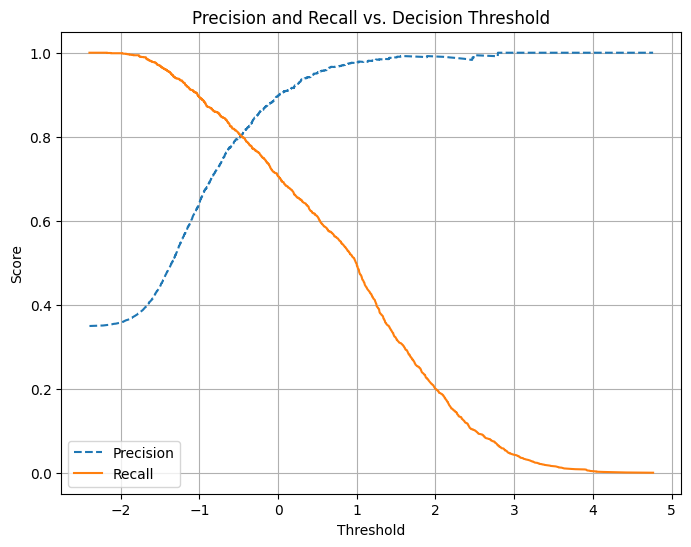

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recall[:-1], label="Recall", linestyle="-")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Decision Threshold")
plt.legend()
plt.grid()
plt.show()

## Exercise 5: Cost function
Assume that a false negative is twice as bad (costly) than a false positive. I.e. we would rather waste time checking gamma ray sources that are not real, than missing an interesting gamma ray source. Use ROC analysis to find the optimal threshold under this assumption.

Finally, let the model make predictions using the optimal threshold and report all 5 scores. Is recall better now? Did we lose a lot of precision?

In [39]:
from sklearn.metrics import roc_curve

y_pred = svc.predict(Xs_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

ratio_pos = sum([1 if y == 1 else 0 for y in y_test]) / len(y_test)

# We are interested in the true class 'positive' (label 1)
total_costs = fpr * 2 * ratio_pos + (1 - tpr) * (1 - ratio_pos)

optimal_idx = np.argmin(total_costs)

optimal_threshold = thresholds[optimal_idx]


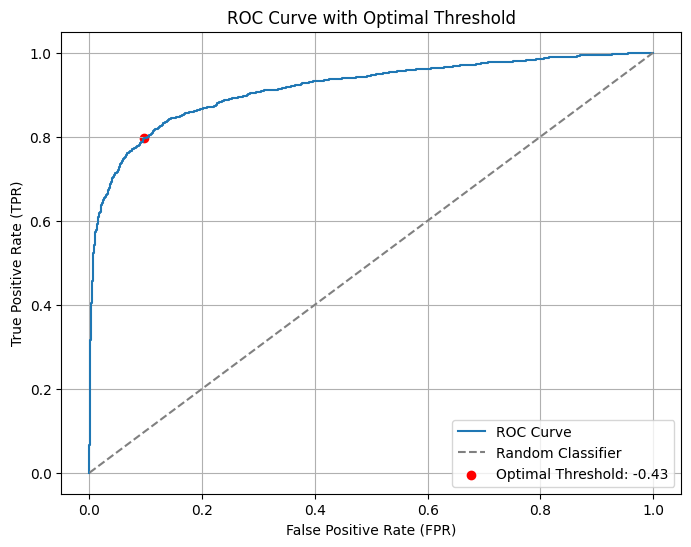

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', 
            label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.grid()
plt.show()
